In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data
df = pd.read_csv('Pre_AI_Companies.csv')
df.head()

,Company Name,Description,Headquarters,Founded,Annual Revenue,Glassdoor Score
0,Alibaba Cloud,Best for Big Data Analytics,China,2009.0,479.5,3.75
1,DataRobot,Best for Automated Machine Learning,Massachusetts,2012.0,338.2,3.75
2,Google,Best for AI Development,California,1998.0,305600.0,4.45
3,Hugging Face,Best for Deploying AI Models in the Cloud,New York,2016.0,40.0,4.35
4,H2O.ai,Best for Time Series Forecasting,California,2011.0,69.2,3.15


In [2]:
df.drop(['Description','Headquarters','Company Name'],axis=1,inplace=True)

In [3]:
df = pd.get_dummies(df, drop_first=True,dtype=int)

In [4]:
df

,Founded,Annual Revenue,Glassdoor Score
0,2009.0,479.5,3.75
1,2012.0,338.2,3.75
2,1998.0,305600.0,4.45
3,2016.0,40.0,4.35
4,2011.0,69.2,3.15
...,...,...,...
95,2016.0,438.8,3.85
96,2016.0,100.0,3.45
97,2003.0,96770.0,3.65
98,2016.0,1400.0,3.75


In [7]:

X_train = df.drop(columns=['Annual Revenue'],axis=1)
y_train = df['Annual Revenue']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

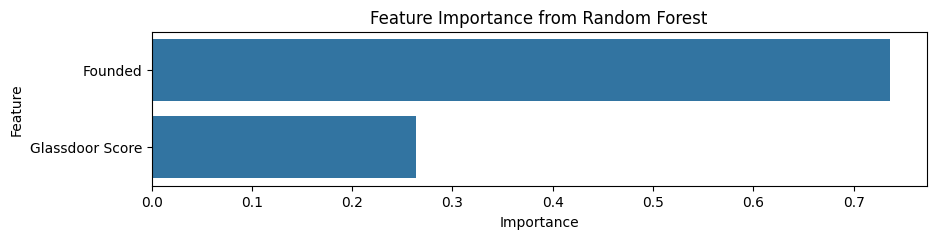

In [8]:
# Feature importance
importances = model.feature_importances_

features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 2))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()